In [4]:
import time
import numpy as np
import math
import matplotlib.pyplot as plt
from multiprocessing import Pool
import random
import timeit
import copy
import pandas as pd
import warnings
import scipy.integrate as integrate
warnings.filterwarnings('ignore')
import os
import re

In [5]:
font=15
fontfml='Times New Roman'
plt.rcParams['font.size'] = font
plt.rcParams['font.family'] = fontfml
plt.rcParams['mathtext.fontset']='custom'
plt.rcParams['mathtext.rm'] =fontfml
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

In [30]:
path = "./"
Fls = os.listdir(path)
targetstr='resolution.npy'
Fls = [f for f in Fls if f.startswith("SW_results_200layer_1000bundle_60theta")]
Fls

['SW_results_200layer_1000bundle_60theta_2.0AR.npy',
 'SW_results_200layer_1000bundle_60theta_8.0AR.npy',
 'SW_results_200layer_1000bundle_60theta_10.0AR.npy',
 'SW_results_200layer_1000bundle_60theta_4.0AR.npy',
 'SW_results_200layer_1000bundle_60theta_12.0AR.npy',
 'SW_results_200layer_1000bundle_60theta_6.0AR.npy']

In [31]:
numbers = []
for string in Fls:
    match = re.search(r'_([\d.]+)AR.npy', string)
    if match:
        number = float(match.group(1))
        numbers.append(number)
numbers

[2.0, 8.0, 10.0, 4.0, 12.0, 6.0]

In [32]:
def calculateF(res,nu):
    #F_gas = res.item().get('F_n_abs')
    F_total = 0
    #items = ['F_n_abs', 'F_n_abs_leftn', 'F_n_abs_rights', 'F_n_abs_fronte', 'F_n_abs_backw']
    items = ['F_n_abs']
    for item in items:
        temp = res.item().get(item)
        F_i = integrate.trapz(np.array(temp), nu, axis=1)
        F_total += np.sum(F_i)
    return F_total
def check_convergence(y):
    diff = []
    for i in range(len(y)):
        dy = 1-abs((y[i] - y[-1])/y[-1])
        diff.append(dy)
    return diff

In [33]:
#name = []
#res.item().keys()
result = []
for i in range(len(Fls)):
    dnu = 5
    # nu = np.arange(0, 2500+dnu,dnu)  # cm-1
    try:
        nu = np.arange(2500, 33333+dnu, dnu)
        res = np.load(Fls[i], allow_pickle=True)
        F_total = calculateF(res, nu)
    except:
        nu = np.arange(2500, 33333, dnu)
        res = np.load(Fls[i], allow_pickle=True)
        F_total = calculateF(res, nu)
    #name.append(Fls[i][9])
    result.append(np.sum(F_total))

In [34]:
df = pd.DataFrame([result],columns=numbers)

# Define the desired column order as a list of numbers
desired_order = list(np.sort(numbers)[::-1])

# Sort the columns based on the desired order
df_sorted = df.reindex(columns=desired_order)
df_sorted

,12.0,10.0,8.0,6.0,4.0,2.0
0,546.571627,810.071015,837.360364,838.139014,838.358996,838.763027


# SW

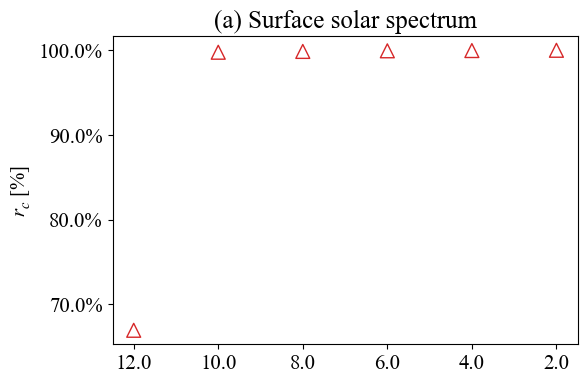

In [19]:

fontfml='Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman'  # For example, set font to Arial
plt.rcParams['font.size'] = 15  # 

from matplotlib.ticker import PercentFormatter

# Define the x and y values
x = np.arange(len(Fls)) + 1
# ymean = np.mean(result)
y = df_sorted.values  # - ymean
 
# Create the first plot
fig, ax2 = plt.subplots(figsize=(6, 4))
#ax1.scatter(x, y, s=100, facecolors='none', edgecolors='C0', label='Broadband flux')
mean_value = np.mean(y)
diff = check_convergence(y[0])
#ax1.axhline(mean_value, color='C0', linestyle='--', label='Mean of broadband flux')

#ax1.set_xlabel(r'Resolution of wavenumber $N_\nu$')
#ax1.set_ylabel('Broadband flux [W/m$^2$]')

x_labels = df_sorted.columns
ax2.set_xticks(x)
ax2.set_xticklabels(x_labels)

# Create twin axes
#ax2 = ax1.twinx()
ax2.scatter(x, diff, s=100, marker='^', facecolors='none', edgecolors='C3', label='Convergence rate')
#ax2.set_ylim(0.93, 1.002)

ax2.set_ylabel(r'$r_c$ [%]')
ax2.yaxis.set_major_formatter(PercentFormatter(1))

# Combine legends
#lines, labels = ax1.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
#fig.legend(lines + lines2, labels + labels2, loc='lower left',bbox_to_anchor=(0.15, 0.15))

# Set labels and title
plt.title('(a) Surface solar spectrum')

#plt.savefig('dnu_sw_4.png')
#fig.savefig('dnu_sw_4.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

In [90]:
xs = x
diffs = diff
#diffs = [round(x, 4) if not np.isnan(x) else float('nan') for x in diffs]
diffs

[0.9997673512409999, 0.9999917640890614, 0.999955713644472, 1.0]

In [91]:
# time efficiency
reso=[1,3,5,10][::-1]
swt = [664.6,225.698,135.16,69.27,np.nan][::-1]
lwt=[692.87,259.97,137.54,70.425,np.nan][::-1]

In [92]:
swt = np.array(swt)
lwt = np.array(lwt)

In [93]:
swt = swt/(np.nanmax(swt)-np.nanmin(swt))
lwt = lwt/(np.nanmax(lwt)-np.nanmin(lwt))

# long wave - du = 4

In [94]:
path = "./"
Fls = os.listdir(path)
targetstr='5800_results_200layer_1000bundle_0theta'
Fls = [f for f in Fls if f.startswith(targetstr)]
Fls

['5800_results_200layer_1000bundle_0theta_3resolution.npy',
 '5800_results_200layer_1000bundle_0theta_10resolution.npy',
 '5800_results_200layer_1000bundle_0theta_5resolution.npy',
 '5800_results_200layer_1000bundle_0theta_1resolution.npy']

In [95]:
def calculateF(res,nu):
    #F_gas = res.item().get('F_n_abs')
    F_total = 0
    #items = ['F_n_abs', 'F_n_abs_leftn', 'F_n_abs_rights', 'F_n_abs_fronte', 'F_n_abs_backw']
    items = ['F_n_abs']
    for item in items:
        temp = res.item().get(item)
        F_i = integrate.trapz(np.array(temp), nu, axis=1)
        F_total += np.sum(F_i[-8])
    return F_total
def check_convergence(y):
    diff = []
    for i in range(len(y)):
        dy = 1-abs((y[i] - y[-1])/y[-1])
        diff.append(dy)
    return diff

In [96]:
numbers = []
for string in Fls:
    match = re.search(r'_([\d.]+)resolution', string)
    if match:
        number = float(match.group(1))
        numbers.append(number)
#numbers

#name = []
result = []
for i in range(len(Fls)):
    dnu = numbers[i]
    nu = np.arange(1, 33333+dnu,dnu)  # cm-1
    #nu = np.arange(2500, 35000, dnu)
    res = np.load(Fls[i], allow_pickle=True)
    F_total = calculateF(res, nu)
    #name.append(Fls[i][9])
    result.append(np.sum(F_total))
df = pd.DataFrame([result],columns=numbers)

# Define the desired column order as a list of numbers
desired_order = list(np.sort(numbers)[::-1])

# Sort the columns based on the desired order
df_sorted = df.reindex(columns=desired_order)
df_sorted

,10.0,5.0,3.0,1.0
0,619329.89173,627566.275732,628078.191182,625939.462115


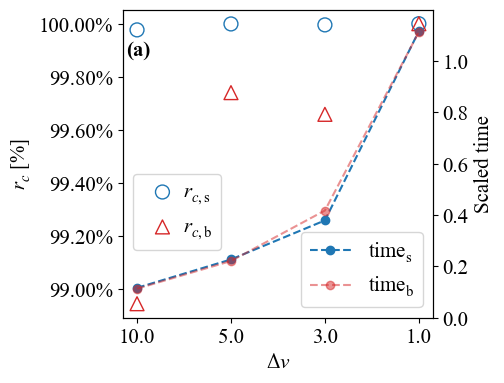

In [126]:
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mticker
font=15
fontfml='Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman'  # For example, set font to Arial
plt.rcParams['font.size'] = 15  # 

x = np.arange(len(Fls)) + 1
y = df_sorted.values  # - ymean

# Create the first plot
fig, ax1 = plt.subplots(figsize=(4, 4))  # figsize=(15, 4)
ax1.scatter(xs, diffs, s=100, facecolors='none', edgecolors='C0', label=r'$r_{c,\mathrm{s}}$')
mean_value = np.mean(y)
diff = check_convergence(y[0])

# x_labels = df_sorted.columns
# ax1.set_xticks(x)
# ax1.set_xticklabels(x_labels)
# diff = [round(x, 4) if not np.isnan(x) else float('nan') for x in diff]
# ax1.scatter(x, diff, s=100, marker='^', facecolors='none', edgecolors='C3', label=r'$r_{c,\mathrm{blackbody}}$')
# ax1.text(0.9, 0.03, '(b)', transform=ax1.transAxes, fontsize=font, family=fontfml,weight='bold')
# plt.legend(bbox_to_anchor=(0.35, 1.0), handletextpad=0.01)

# ax1.set_xlabel(r'$\Delta_\nu$')
# ax1.set_ylabel(r'$r_c$ [%]')
# ax1.yaxis.set_major_formatter(PercentFormatter(1,decimals=3))
# #plt.legend(loc="lower left")
# ax1.text(0.9, 0.88, '(a)', transform=ax1.transAxes, fontsize=font, family=fontfml,weight='bold')

x_labels = df_sorted.columns
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels)
ax1.scatter(x, diff, s=100, marker='^', facecolors='none', edgecolors='C3', label=r'$r_{c,\mathrm{b}}$')
ax1.set_xlabel(r'$\Delta\nu$')
ax1.set_ylabel(r'$r_c$ [%]')
ax1.yaxis.set_major_formatter(PercentFormatter(1,decimals=2))
#plt.legend(loc="center")
#ax1.set_ylim(0.99995,1.000005 )
ax1.text(0.01, 0.85, '(a)', transform=ax1.transAxes, fontsize=font, family=fontfml,weight='bold')
plt.legend(bbox_to_anchor=(0.35, 0.5), handletextpad=0.01)


ax2 = ax1.twinx()
#ax2.scatter(x, np.array(swt), s=10,color='C0', label='Solar time')
#ax2.scatter(x, np.array(lwt), s=10,color='C3',alpha=0.5, label='Blackbody time')
ax2.plot(x, np.array(swt[1:]), 'o--',color='C0', label='time$_\mathrm{s}$')
ax2.plot(x, np.array(lwt[1:]), 'o--',color='C3',alpha=0.5, label='time$_\mathrm{b}$')
ax2.set_ylabel('Scaled time')
ax2.set_ylim(1.2, 0)
ytick = np.array([1, 0.8, 0.6, 0.4, 0.2, 0. ])
ax2.set_yticks(ytick)
ax2.set_yticklabels(ytick)
ax2.invert_yaxis()
plt.legend(loc = "lower right")
fig_dir = './../figure/'
fig.savefig(fig_dir+'dnu_deptest.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

In [60]:
swt

array([nan, nan, nan, nan, nan])

In [36]:
!pwd

/Users/dengnan/Library/CloudStorage/OneDrive-TheHongKongPolytechnicUniversity/git_store/LBL_RTM_liquid_water/results/independent
